In [17]:
# run this to shorten the data import from the files
path_data = '/home/nero/Documents/Estudos/DataCamp/Python/courses/Survival_Analysis_in_Python/datasets/'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
prison = pd.read_csv(path_data+'rossi.csv')
display(prison.head(), prison.shape)

,Unnamed: 0,week,arrest,fin,age,race,wexp,mar,paro,prio
0,0,20,1,0,27,1,0,0,1,3
1,1,17,1,0,18,1,0,0,1,8
2,2,25,1,0,19,0,1,0,1,13
3,3,52,0,1,23,1,1,1,1,1
4,4,52,0,0,19,0,1,0,1,3


(432, 10)

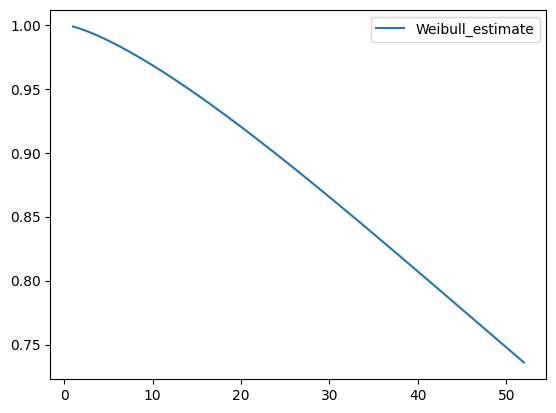

'\nGood job! Even though the survival function does not show the median due to limited data, WeibullFitter uses linear interpolation to predict the median survival time.\n'

In [19]:
# exercise 01

"""
Model prison data with Weibull

You are a sociologist studying the time it takes for convicts to be rearrested after their release. The DataFrame prison contains information from 432 convicts who were released from Maryland state prisons in the 1970s and who were followed up with one year after release.

You will model the survival function of time-to-arrest using the Weibull model.

The matplotlib.pyplot library is imported as plt, and the pandas and numpy libraries are imported as pd and np, respectively. Use the console to explore the DataFrame and its column names as needed.
"""

# Instructions

"""

    Import the WeibullFitter class from lifelines.
    Create an instance of WeibullFitter called wb.
---

    Fit wb with appropriate columns from prison.
---

    Get the survival function of wb and plot it.
---
Question

What is approximately the median time it takes for a released ex-convict to be arrested?

Feel free to write additional code in the console to extract the information you need from the model.
(median = 94.55 weeks)
"""

# solution

# Import WeibullFitter class
from lifelines import WeibullFitter

# Instantiate WeibullFitter class wb
wb = WeibullFitter()

# Fit data to wb
wb.fit(durations=prison['week'], event_observed=prison['arrest'])

# Plot survival function
wb.survival_function_.plot()
plt.show()

#----------------------------------#

# Conclusion

"""
Good job! Even though the survival function does not show the median due to limited data, WeibullFitter uses linear interpolation to predict the median survival time.
"""

In [20]:
wb.median_survival_time_

94.5561872278691

In [21]:
# exercise 02

"""
Compare Weibull model parameters

Some convicts in the study were released on parole. Because parolees experience stricter restrictions, you suspect that their initial arrest rate is high but decreases as time goes on, while other convicts' arrest rate increases as time goes on.

You will fit a Weibull estimator to parolees and non-parolees separately. You will then compare their model parameters to verify your hypothesis. The DataFrame you will use is called prison.

The matplotlib.pyplot library is imported as plt, the pandas and numpy libraries are imported as pd and np, respectively. The WeibullFitter class has been imported for you and a new instance called wb has been created. Use the console to explore the DataFrame as needed.
"""

# Instructions

"""

    Create a Boolean mask called parole for parolees.
---
Fit wb to the appropriate columns of parolees. Use the Boolean mask before selecting the columns.
Print the 'rho' parameter value of the fitted model wb.
---
Fit wb to the data of non-parolees.
Print 'rho' parameter value of the fitted model wb.
---
Question

You suspect that parolees' arrest rate decreases as time goes on while other convicts' arrest rate increases as time goes on.

Based on the 'rho' values printed and what you know about the Weibull distribution, is your suspicion verified?
(No, they both increase)
"""

# solution

# Mask for parole
parole = (prison['paro'] == 1)

# Fit to parolee data
wb.fit(durations=prison[parole]['week'], event_observed=prison[parole]['arrest'])

# Print rho
print("The rho_ parameter of parolee survival function is: ", wb.rho_)

# Fit to non parolee
wb.fit(prison[~parole]['week'], prison[~parole]['arrest'])

# Print rho
print("The rho_ parameter of non-parolee survival function is: ", wb.rho_)

#----------------------------------#

# Conclusion

"""
Good job! Both rho values are larger than 1, which indicates that both populations' rate of event increases as time goes on.
"""

The rho_ parameter of parolee survival function is:  1.4181024400796285
The rho_ parameter of non-parolee survival function is:  1.2943809760486589


"\nGood job! Both rho values are larger than 1, which indicates that both populations' rate of event increases as time goes on.\n"

In [22]:
heart_patients = pd.read_csv(path_data+'heart_patients.csv')
display(heart_patients.head(),heart_patients.shape)

,survival,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,observed
0,11.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,1.0
1,19.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,1.0
2,16.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.0
3,57.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,1.0
4,19.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.0


(61, 9)

In [23]:
# exercise 03

"""
Analyze heart patients characteristics

You want to understand how different characteristics of the heart change patients' survival outcomes. If you can identify warning signs, maybe you can apply treatments and increase patients' chances of survival!

You will regress patient characteristics against their survival durations using Weibull accelerated failure time (AFT) model.

In this enriched dataset, you have a few more data points about each patient in the heart_patients DataFrame. Use the console to explore the column names. The pandas and numpy packages are loaded as pd and np.
"""

# Instructions

"""
Import the WeibullAFTFitter class and instantiate a WeibullAFTFitter object called aft.
---

    Fit the WeibullAFTFitter model object to the DataFrame heart_patients.
---

    Print the summary of the model object aft using the .summary attribute.
---

    How much does a one-unit increase in EPSS change the average survival time? Calculate it using np.exp() and save the result as exp_epss.

"""

# solution

# Import WeibullAFTFitter and instantiate
from lifelines import WeibullAFTFitter
aft = WeibullAFTFitter()

# Fit heart_patients data into aft
aft.fit(heart_patients, duration_col='survival', event_col='observed')

# Print the summary
display(aft.summary)

# Calculate the exponential of EPSS coefficient
exp_epss = np.exp(aft.params_.loc['lambda_'].loc['epss'])
print('When EPSS increases by 1, the average survival duration changes by a factor of ', exp_epss)

#----------------------------------#

# Conclusion

"""
Nicely done! The intuitive coefficient interpretation is a nice feature of the Weibull AFT regression model.
"""

coef  exp(coef)  se(coef)  coef lower 95%  \
param   covariate                                                             
lambda_ age                   0.004094   1.004103  0.008454       -0.012475   
        epss                 -0.022114   0.978129  0.018199       -0.057784   
        fractionalshortening -0.119929   0.886983  0.709713       -1.510940   
        lvdd                  0.065512   1.067706  0.109837       -0.149765   
        pericardialeffusion   0.025630   1.025962  0.185600       -0.338140   
        wallmotion-index      0.131036   1.140008  0.315619       -0.487566   
        wallmotion-score     -0.009944   0.990106  0.027811       -0.064453   
        Intercept             3.280618  26.592195  0.870307        1.574847   
rho_    Intercept             0.928306   2.530219  0.125634        0.682068   

                              coef upper 95%  exp(coef) lower 95%  \
param   covariate                                                   
lambda_ age                         0.020664             0.987602   
        epss                        0.013556             0.943854   
        fractionalshortening        1.271082             0.220702   
        lvdd                        0.280790             0.860910   
        pericardialeffusion         0.389400             0.713096   
        wallmotion-index            0.749637             0.614119   
        wallmotion-score            0.044566             0.937580   
        Intercept                   4.986389             4.830000   
rho_    Intercept                   1.174544             1.977964   

                              exp(coef) upper 95%  cmp to         z  \
param   covariate                                                     
lambda_ age                              1.020879     0.0  0.484322   
        epss                             1.013648     0.0 -1.215115   
        fractionalshortening             3.564709     0.0 -0.168982   
        lvdd                             1.324175     0.0  0.596448   
        pericardialeffusion              1.476095     0.0  0.138094   
        wallmotion-index                 2.116233     0.0  0.415170   
        wallmotion-score                 1.045574     0.0 -0.357536   
        Intercept                      146.406789     0.0  3.769493   
rho_    Intercept                        3.236665     0.0  7.388976   

                                         p   -log2(p)  
param   covariate                                      
lambda_ age                   6.281576e-01   0.670802  
        epss                  2.243221e-01   2.156357  
        fractionalshortening  8.658104e-01   0.207877  
        lvdd                  5.508759e-01   0.860201  
        pericardialeffusion   8.901660e-01   0.167854  
        wallmotion-index      6.780174e-01   0.560606  
        wallmotion-score      7.206909e-01   0.472547  
        Intercept             1.635795e-04  12.577720  
rho_    Intercept             1.479634e-13  42.619825

When EPSS increases by 1, the average survival duration changes by a factor of  0.9781286998367273


'\nNicely done! The intuitive coefficient interpretation is a nice feature of the Weibull AFT regression model.\n'

In [24]:
heart_patients = pd.read_csv(path_data+'heart_patients_2.csv')
display(heart_patients.head(), heart_patients.shape)

,survival,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,observed,gender_f
0,11.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,1.0,0
1,19.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,1.0,0
2,16.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.0,1
3,57.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,1.0,1
4,19.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.0,1


(61, 10)

In [25]:
# exercise 04

"""
Explore gender-LVDD interaction

You wonder if the survival risk for heart patients with LVDD (Left Ventricular Diastolic Dysfunction) is higher or lower among female patients. A good way to analyze this is with an interaction term between gender_f (1 if the subject is female, 0 otherwise) and lvdd.

You are going to fit the Weibull AFT model with gender_f*lvdd and interpret their coefficients. The DataFrame you will use is called heart_patients.

The pandas and numpy packages are loaded as pd and np, the WeibullAFTFitter class has been imported for you, and a WeibullAFTFitter instance aft has been created.
"""

# Instructions

"""

    Fit aft with a custom model including epss and an interaction term between gender_f and lvdd.
---

    Print the model summary of aft.
---
Question

With a one-unit increase in lvdd for females, how much does the average survival duration change by?
(1.018)
"""

# solution

# Fit custom model
aft.fit(heart_patients, 
        duration_col='survival', 
        event_col='observed',
        formula='epss + gender_f * lvdd')

# Print model summary
display(aft.summary)

#----------------------------------#

# Conclusion

"""
Great job! When gender_f is 1, the coefficient for lvdd needs to be adjusted by gender_f:lvdd.
"""

coef  exp(coef)  se(coef)  coef lower 95%  \
param   covariate                                                      
lambda_ Intercept      3.419196  30.544834  0.492444        2.454023   
        epss          -0.019498   0.980691  0.016468       -0.051776   
        gender_f      -0.064314   0.937711  1.150511       -2.319275   
        lvdd           0.083970   1.087596  0.109935       -0.131499   
        gender_f:lvdd  0.017482   1.017636  0.245207       -0.463115   
rho_    Intercept      0.929797   2.533996  0.125426        0.683968   

                       coef upper 95%  exp(coef) lower 95%  \
param   covariate                                            
lambda_ Intercept            4.384369            11.635056   
        epss                 0.012779             0.949542   
        gender_f             2.190647             0.098345   
        lvdd                 0.299439             0.876780   
        gender_f:lvdd        0.498079             0.629320   
rho_    Intercept            1.175627             1.981726   

                       exp(coef) upper 95%  cmp to         z             p  \
param   covariate                                                            
lambda_ Intercept                80.187571     0.0  6.943315  3.830029e-12   
        epss                      1.012861     0.0 -1.183983  2.364198e-01   
        gender_f                  8.940998     0.0 -0.055900  9.554213e-01   
        lvdd                      1.349101     0.0  0.763813  4.449785e-01   
        gender_f:lvdd             1.645558     0.0  0.071295  9.431628e-01   
rho_    Intercept                 3.240174     0.0  7.413145  1.233386e-13   

                        -log2(p)  
param   covariate                 
lambda_ Intercept      37.925782  
        epss            2.080577  
        gender_f        0.065791  
        lvdd            1.168192  
        gender_f:lvdd   0.084421  
rho_    Intercept      42.882441

'\nGreat job! When gender_f is 1, the coefficient for lvdd needs to be adjusted by gender_f:lvdd.\n'

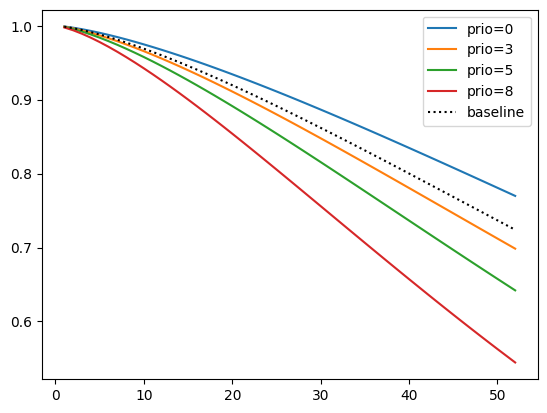

'\nGreat job! .plot_partial_effects_on_outcome() is a useful method to demonstrate how values of any covariates impact the baseline survival curve.\n'

In [26]:
# exercise 05

"""
How do prior arrests impact re-arrest rate?

During the study of the prison data, you obtain new information about each convict, such as the number of convictions prior to current incarceration prio.

You want to visualize how different values of prio impact the baseline survival function modeled with WeibullAFTFitter.

The WeibullAFTFitter class has been imported and a new instance aft has been created. The matplotlib.pyplot library is imported as plt, and the pandas and numpy libraries are imported as pd and np, respectively. Use the console to explore the DataFrame and its column names as needed.
"""

# Instructions

"""

    Fit the prison DataFrame to WeibullAFTFitter class instance aft.
---

    Plot the survival functions for when prio takes on values 0, 3, 5, and 8. Display the plot.
---
Question

From the plot, you could infer the average value range for prio in the original data. Where do you think it is?
(between 0 and 3)
"""

# solution

# Fit data to aft
aft.fit(df=prison,
        duration_col='week',
        event_col='arrest')

# Plot partial effects of prio
aft.plot_partial_effects_on_outcome(covariates='prio', values=[0,3,5,8])
plt.show()

#----------------------------------#

# Conclusion

"""
Great job! .plot_partial_effects_on_outcome() is a useful method to demonstrate how values of any covariates impact the baseline survival curve.
"""

In [27]:
prison_new = pd.read_csv(path_data+'prison_new.csv')
prison_new.head()

,week,arrest,fin,age,wexp,mar,paro,prio
0,0,0,0,23,0,0,0,10
1,0,0,0,24,0,0,0,9
2,0,0,0,22,0,0,0,0
3,0,0,0,41,0,0,0,17
4,0,0,0,41,0,0,0,9


In [28]:
prison = prison.drop(columns=['Unnamed: 0','race'])
prison.head()

,week,arrest,fin,age,wexp,mar,paro,prio
0,20,1,0,27,0,0,1,3
1,17,1,0,18,0,0,1,8
2,25,1,0,19,1,0,1,13
3,52,0,1,23,1,1,1,1
4,52,0,0,19,1,0,1,3


In [29]:
aft.fit(df=prison,
        duration_col='week',
        event_col='arrest')

<lifelines.WeibullAFTFitter: fitted with 432 total observations, 318 right-censored observations>

In [30]:
# exercise 06

"""
Predict re-arrest rate

You developed a survival regression model using covariates about each released convict, including their marital status, prior arrests, etc. Ten new convicts are about to be released, and you will use the model to predict their median time to re-arrest.

The new DataFrame is called prison_new and has the same columns as the old DataFrame prison.

The WeibullAFTFitter class has been imported, and the previously fitted model has been loaded as aft. The pandas and numpy libraries are imported as pd and np, respectively.
"""

# Instructions

"""

    Predict the median time to arrest for each convict in prison_new, assign the predictions to a variable named aft_pred.
---

    Print the mean prediction of median time to arrest.

"""

# solution

# Predict median of new data
aft_pred = aft.predict_median(prison_new)

# Print average predicted time to arrest
print("On average, the median number of weeks for new released convicts to be arrested is: ", np.mean(aft_pred))

#----------------------------------#

# Conclusion

"""
Good job! Explore other prediction methods of the WeibullAFTFitter class here. You could also predict percentiles, expectations, and other survival function statistics.
"""

On average, the median number of weeks for new released convicts to be arrested is:  62.28806105269115


'\nGood job! Explore other prediction methods of the WeibullAFTFitter class here. You could also predict percentiles, expectations, and other survival function statistics.\n'

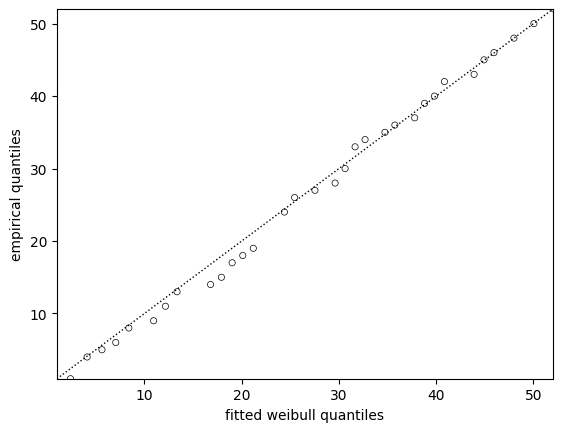

"\nGood job! The QQ plot shows that the Weibull model closely models convicts' time-to-arrest!\n"

In [31]:
# exercise 07

"""
How good is the fit?

You used the Weibull model to fit the prison convict DataFrame prison. But is this the right model to use?

You will evaluate the goodness-of-fit of the model wb using the QQ plot.

The WeibullFitter class has been imported for you, and a Weibull model instance wb has been fitted to the data. The matplotlib.pyplot library is imported as plt, and the pandas and numpy libraries are imported as pd and np, respectively. Use the console to explore the DataFrame and its column names as needed.
"""

# Instructions

"""

    Import the qq_plot function from lifelines.plotting.
    Plot the QQ plot of the fitted model wb.
    Display the QQ plot.

"""

# solution

# Import qq_plot
from lifelines.plotting import qq_plot

# Plot qq_plot of wb
qq_plot(wb)

# Display figure
plt.show()

#----------------------------------#

# Conclusion

"""
Good job! The QQ plot shows that the Weibull model closely models convicts' time-to-arrest!
"""

In [32]:
# exercise 08

"""
Choose a parametric model

Given lifelines offers a variety of parametric models, you want to find the best model for the heart patients DataFrame heart_patients.

Use the AIC score to assess the fit of each model below:

    The Weibull model: WeibullFitter
    The Exponential model: ExponentialFitter
    The Log Normal mode: LogNormalFitter

All lifelines fitters above have been imported for you. The pandas and numpy libraries are imported as pd and np, respectively. Use the console to explore the DataFrame and its column names as needed.
"""

# Instructions

"""
Create an instance of WeibullFitter (wb), ExponentialFitter (exp), and LogNormalFitter (log).
---

    Fit each model to the data separately.
---

    Print the AIC value of each fitted model.
---
Question

Among the 3 models you assessed, which one fits the data the best based on AIC?
(wb)
"""

# solution

from lifelines import ExponentialFitter, LogNormalFitter

# Instantiate each fitter
wb = WeibullFitter()
exp = ExponentialFitter()
log = LogNormalFitter()

# Fit to data
for model in [wb, exp, log]:
  model.fit(durations=heart_patients['survival'],
            event_observed=heart_patients['observed'])
  # Print AIC
  print(model.__class__.__name__, model.AIC_)

#----------------------------------#

# Conclusion

"""
Good job! The Weibull model has the lowest AIC value, which means it is the best choice for the data out of all 3.
"""

WeibullFitter 331.95194834891294
ExponentialFitter 367.02560610624914
LogNormalFitter 334.83975916099007


'\nGood job! The Weibull model has the lowest AIC value, which means it is the best choice for the data out of all 3.\n'